In [1]:
from functions import *
from scipy.stats import mode
from scipy.stats import pearsonr
from functions import *
#https://www.eia.gov/electricity/data/eia923/
file_generation=r"C:\Users\Zelda64\Documents\Programming\dust_solar_power\EIA923_Schedules_2_3_4_5_M_12_2019_Final_Revision.xlsx"


file_ext= "D:\\NASA_AIRS"
file_path_plots=r"C:\Users\Zelda64\Documents\Programming\dust_solar_power\Plots"
file_path_main=r"C:\Users\Zelda64\Documents\Programming\dust_solar_power"

dust_score_circle_mean=pd.read_csv(os.path.join(file_path_main,'dust_score_stats_CAMS49CIRCLE_mean_2hr.csv'),index_col=0)
dust_score_circle_median=pd.read_csv(os.path.join(file_path_main,'dust_score_stats_CAMS49CIRCLE_median_2hr.csv'),index_col=0)
dust_score_circle_mode=pd.read_csv(os.path.join(file_path_main,'dust_score_stats_CAMS49CIRCLE_mode_2hr.csv'),index_col=0)

dust_score_ellipse_mean_2hr=pd.read_csv(os.path.join(file_path_main,'dust_score_stats_CAMS49ELLIPSE_mean_2hr.csv'),index_col=0)
dust_score_ellipse_median_2hr=pd.read_csv(os.path.join(file_path_main,'dust_score_stats_CAMS49ELLIPSE_median_2hr.csv'),index_col=0)
dust_score_ellipse_mode_2hr=pd.read_csv(os.path.join(file_path_main,'dust_score_stats_CAMS49ELLIPSE_mode_2hr.csv'),index_col=0)

dust_score_ellipse_mean_TEST=pd.read_csv(os.path.join(file_path_main,'dust_score_stats_CAMS49ELLIPSE_mean_hourlyTEST.csv'),index_col=0)
#dust_score_ellipse_median_4hr=pd.read_csv(os.path.join(file_path_main,'dust_score_stats_CAMS49ELLIPSE_median_4hr.csv'),index_col=0)
#dust_score_ellipse_mode_4hr=pd.read_csv(os.path.join(file_path_main,'dust_score_stats_CAMS49ELLIPSE_mode_4hr.csv'),index_col=0)

dust_score_ellipse_mean_hourly=pd.read_csv(os.path.join(file_path_main,'dust_score_stats_CAMS49ELLIPSE_mean_hourly_new.csv'),index_col=0)
dust_score_ellipse_median_hourly=pd.read_csv(os.path.join(file_path_main,'dust_score_stats_CAMS49ELLIPSE_median_hourly_new.csv'),index_col=0)
dust_score_ellipse_mode_hourly=pd.read_csv(os.path.join(file_path_main,'dust_score_stats_CAMS49ELLIPSE_mode_hourly_new.csv'),index_col=0)


folder_year_list=sorted(os.listdir(file_ext))
file_ghi_2019=r"C:\Users\Zelda64\Documents\Programming\dust_solar_power\NREL_NSRDB\GHI_CAMS49_2019.csv"
file_ghi_2020=r"C:\Users\Zelda64\Documents\Programming\dust_solar_power\NREL_NSRDB\GHI_CAMS49_2020.csv"
file_ghi_2021=r"C:\Users\Zelda64\Documents\Programming\dust_solar_power\NREL_NSRDB\GHI_CAMS49_2021.csv"

generation_df=pd.read_excel(file_generation, sheet_name="Page 1 Generation and Fuel Data", header=5, engine="openpyxl")

ghi_2019=pd.read_csv(file_ghi_2019, header=[2], engine="python")
ghi_2020=pd.read_csv(file_ghi_2020, header=[2], engine="python")
ghi_2021=pd.read_csv(file_ghi_2021, header=[2], engine="python")
ghi_df = pd.concat([ghi_2019, ghi_2020, ghi_2021], ignore_index=True)
ghi_df_header=pd.read_csv(file_ghi_2019, engine="python", nrows=1)
ghi_df['Datetime']= pd.to_datetime(ghi_df['Year'].astype(str) + '-' + ghi_df['Month'].astype(str) + '-' + ghi_df['Day'].astype(str) + '-' + ghi_df['Hour'].astype(str), format='%Y-%m-%d-%H')
ghi_df.set_index('Datetime', inplace=True)


In [2]:
#max that solar farm can produce at a moment in time, e.g. at noon in the summer
#assume DC (e.g. no conversion to AC, usually at efficiency of 15-20%)
max_capacity=120000000
dc_ac_efficiency=0.2
Wp=400
panel_area=2
panel_yield=0.8
#Performance Ratio
PR=0.75
number_of_panels=468384
panel_yield


0.8

In [3]:
generation_df_texas=generation_df[generation_df["Plant State"]=="TX"]
generation_df_texas_solar=generation_df_texas[generation_df_texas["Reported\nFuel Type Code"]=="SUN"]
generation_df_texas_solar_WECC=generation_df_texas_solar[generation_df_texas["NERC Region"]=="WECC"]
generation_df_texas_solar_WECC["Plants"]=np.arange(0,generation_df_texas_solar_WECC.shape[0],1)
generation_df_texas_solar_WECC.set_index('Plants', inplace=True)
#plant generation in MW near El Paso
#Newman Solar 10MW plant
elec_gen_2019_newman_elpaso=generation_df_texas_solar_WECC.loc[0,'Netgen\nJanuary':'Netgen\nDecember']
#Montana Solar Facility 3MW plant
elec_gen_2019_montana_elpaso=generation_df_texas_solar_WECC.loc[1,'Netgen\nJanuary':'Netgen\nDecember']
#180MW power plant in texas, upton county
elec_gen_2019_uptoncounty=generation_df_texas_solar[generation_df_texas_solar['Plant Name']=="Upton County Solar"]
elec_gen_2019_uptoncounty=elec_gen_2019_uptoncounty.loc[12300]['Netgen\nJanuary':'Netgen\nDecember']

C:\Users\Zelda64\AppData\Local\Temp\ipykernel_2992\2155190767.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  generation_df_texas_solar_WECC=generation_df_texas_solar[generation_df_texas["NERC Region"]=="WECC"]
C:\Users\Zelda64\AppData\Local\Temp\ipykernel_2992\2155190767.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generation_df_texas_solar_WECC["Plants"]=np.arange(0,generation_df_texas_solar_WECC.shape[0],1)


In [4]:
windspd_year_mean=[]
windspd_year_median=[]
windspd_year_mode=[]
for year in [2019,2020,2021]:
    #dates_year= pd.date_range(start=f'{year}-01-01', end=f'{year+1}-01-01', freq='D')[:-1]
    dates_year_hours= pd.date_range(start=f'{year}-01-01', end=f'{year+1}-01-01', freq='H')[:-1]
    #print(dates_year)
    windspd_daily_mean=[]
    windspd_daily_median=[]
    windspd_daily_mode=[]
    for day in range(0,len(dates_year_hours),24):
        one_day=ghi_df['Wind Speed'][dates_year_hours[day]:dates_year_hours[day+23]]
        windspd_daily_mean.append(np.mean(one_day))
        windspd_daily_median.append(np.median(one_day))
        windspd_daily_mode.append(mode_float(one_day.values, int(len(one_day))-1)[0])
    windspd_year_mean.append(windspd_daily_mean)
    windspd_year_median.append(windspd_daily_median)
    windspd_year_mode.append(windspd_daily_mode)

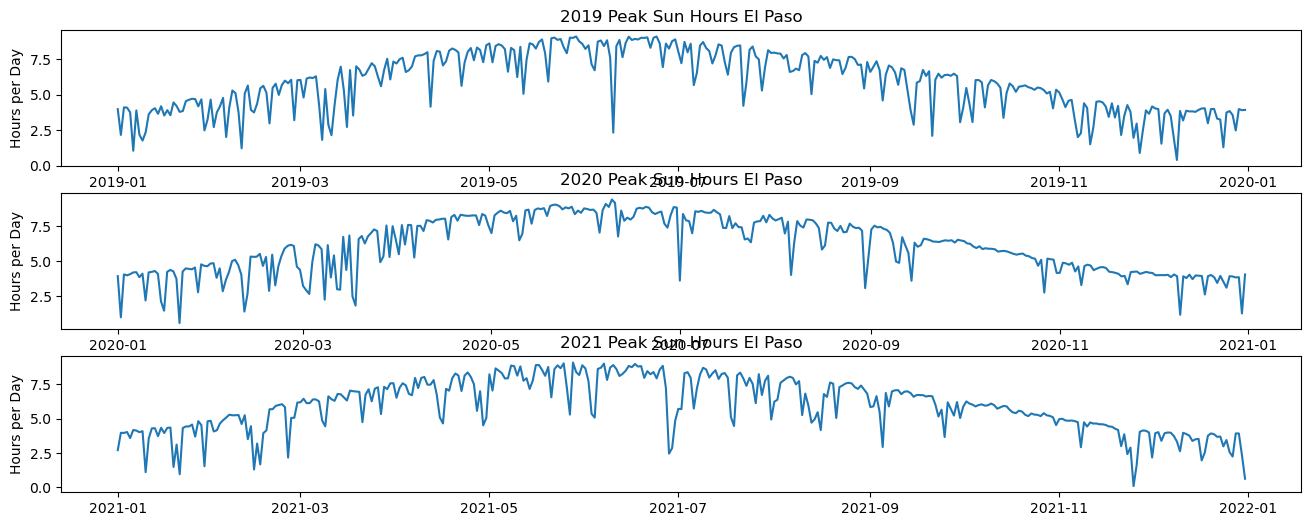

In [30]:
sun_hours_year=[]
num_peak_sun_hours_year=[]
fig,axs=plt.subplots(3, 1,figsize=(16, 6))
count=0
for year in [2019,2020,2021]:    
    dates_year_hours= pd.date_range(start=f'{year}-01-01', end=f'{year+1}-01-01', freq='H')[:-1]
    dates_year= pd.date_range(start=f'{year}-01-01', end=f'{year+1}-01-01', freq='D')[:-1]
    dates_year_monthly=pd.date_range(start=f'{year}-01-01', end=f'{year+1}-01-01', freq='M')
    num_peak_sun_hours_hourly=[]
    num_peak_sun_hours_daily=[]
    num_peak_sun_hours_monthly=[]
    
    daily_ghi=[]
    month_count=0
    last_day=0
    for day in range(0,len(dates_year_hours),24):
        if dates_year_hours[day]==dates_year_monthly[month_count]:
            
            num_peak_sun_hours_monthly.append(num_peak_sun_hours_hourly[last_day:day])
            #if len(num_peak_sun_hours_monthly)==12:
            #    num_peak_sun_hours_year.append(num_peak_sun_hours_monthly)
            last_day=day
            month_count+=1
        one_day=ghi_df['GHI'][dates_year_hours[day]:dates_year_hours[day+23]]
        #average kWh/m^2/day
        num_peak_sun_hours_hourly = np.append(num_peak_sun_hours_hourly,one_day/1000)
        #num_peak_sun_hours_daily = np.append(num_peak_sun_hours_daily,sum(one_day/1000))
        num_peak_sun_hours_daily.append(sum(one_day/1000))

    num_peak_sun_hours_year.append(num_peak_sun_hours_monthly)
    axs[count].plot(dates_year,num_peak_sun_hours_daily)
    axs[count].set_title(f'{year} Peak Sun Hours El Paso')
    axs[count].set_ylabel("Hours per Day")    
    #sun_hours_year = np.append(sun_hours_year,num_peak_sun_hours_daily)
    sun_hours_year.append(num_peak_sun_hours_daily)
    count+=1



In [6]:
num_peak_sun_hours_year_daily=np.empty((3,12))
count=0
for year in num_peak_sun_hours_year:
    for month in range(len(year)):
        num_peak_sun_hours_year_daily[count][month]=sum(year[month])
    count+=1

num_peak_sun_hours_year_daily

array([[109.511, 126.778, 173.891, 224.241, 253.263, 248.113, 236.549,
        225.115, 182.491, 160.187, 108.044, 105.883],
       [112.323, 133.734, 160.911, 229.26 , 260.284, 253.746, 240.916,
        223.166, 191.078, 172.785, 129.737, 114.028],
       [111.498, 128.427, 200.031, 215.12 , 250.189, 236.104, 230.549,
        209.63 , 185.695, 174.863, 122.122, 106.188]])

In [7]:
'''
for elem in range(len(sun_hours_year)): 
    sun_hours_year[elem]=np.mean(sun_hours_year[elem])
sun_hours_year
'''

'\nfor elem in range(len(sun_hours_year)): \n    sun_hours_year[elem]=np.mean(sun_hours_year[elem])\nsun_hours_year\n'

In [8]:

#1 Peak Sun Hour is 1kWh/m^2 of solar energy
#Calculate Energy Production from Peak Sun Hours
energy_generation_plant_anual=[]
energy_generation_plant=[]
for elem in range(len([2019,2020,2021])):
    #kWh/m2 or average peak sun hours per day per panel(panel area not required?)
    energy_perpanel_perday=np.array(sun_hours_year[elem])*Wp/1000*panel_yield
    #MWh of energy generation for the whole plant for a year
    energy_generation_plant.append(energy_perpanel_perday*number_of_panels*PR/1000)
    #Annual Solar Energy Production at farm (millions of kWh)
    #taking into account Performance Ratio of plant
    energy_generation_plant_anual.append(np.sum(np.array(energy_generation_plant[elem]))*1000)

energy_generation_plant_anual

[242585778.51648, 250231828.81536004, 244052419.968]

In [9]:
#The average U.S. household consumes about 10,500 kilowatthours (kWh)
#https://experience.arcgis.com/experience/cbf6875974554a74823232f84f563253
#https://www.eia.gov/consumption/residential/data/2020/c&e/pdf/ce2.4.pdf
#only take into account the amount of electricity used (refrigeration, ac, other uses), in south US
#66.2MMBTUs= 19401.3047972293kWh
us_household_consumption=10500
south_household_consumption_2023=13364.0407666716
households_powered=np.array(energy_generation_plant_anual)/south_household_consumption_2023
households_powered

array([18152.12799421, 18724.26410427, 18261.8733532 ])

C:\Users\Zelda64\AppData\Local\Temp\ipykernel_2992\1089656501.py:124: RuntimeWarning: Mean of empty slice
  axs[1].plot(date_index, np.nanmean(perday_values_annual_ellipse_mean_hourly,axis=1), label='Daily Mean',color='green',alpha=0.75)
C:\Users\Zelda64\AppData\Local\Temp\ipykernel_2992\1089656501.py:128: RuntimeWarning: Mean of empty slice
  axs[2].plot(date_index, np.nanmean(perday_values_annual_ellipse_mean_TEST,axis=1), label='Daily Mean',color='green',alpha=0.75)
C:\Users\Zelda64\AppData\Local\Temp\ipykernel_2992\1089656501.py:128: RuntimeWarning: Mean of empty slice
  axs[2].plot(date_index, np.nanmean(perday_values_annual_ellipse_mean_TEST,axis=1), label='Daily Mean',color='green',alpha=0.75)
C:\Users\Zelda64\AppData\Local\Temp\ipykernel_2992\1089656501.py:134: RuntimeWarning: Mean of empty slice
  axs[3].plot(date_index, np.nanmean(perday_values_annual_circle_mean,axis=1), label='Daily Mean',color='green',alpha=0.75)
C:\Users\Zelda64\AppData\Local\Temp\ipykernel_2992\108965650

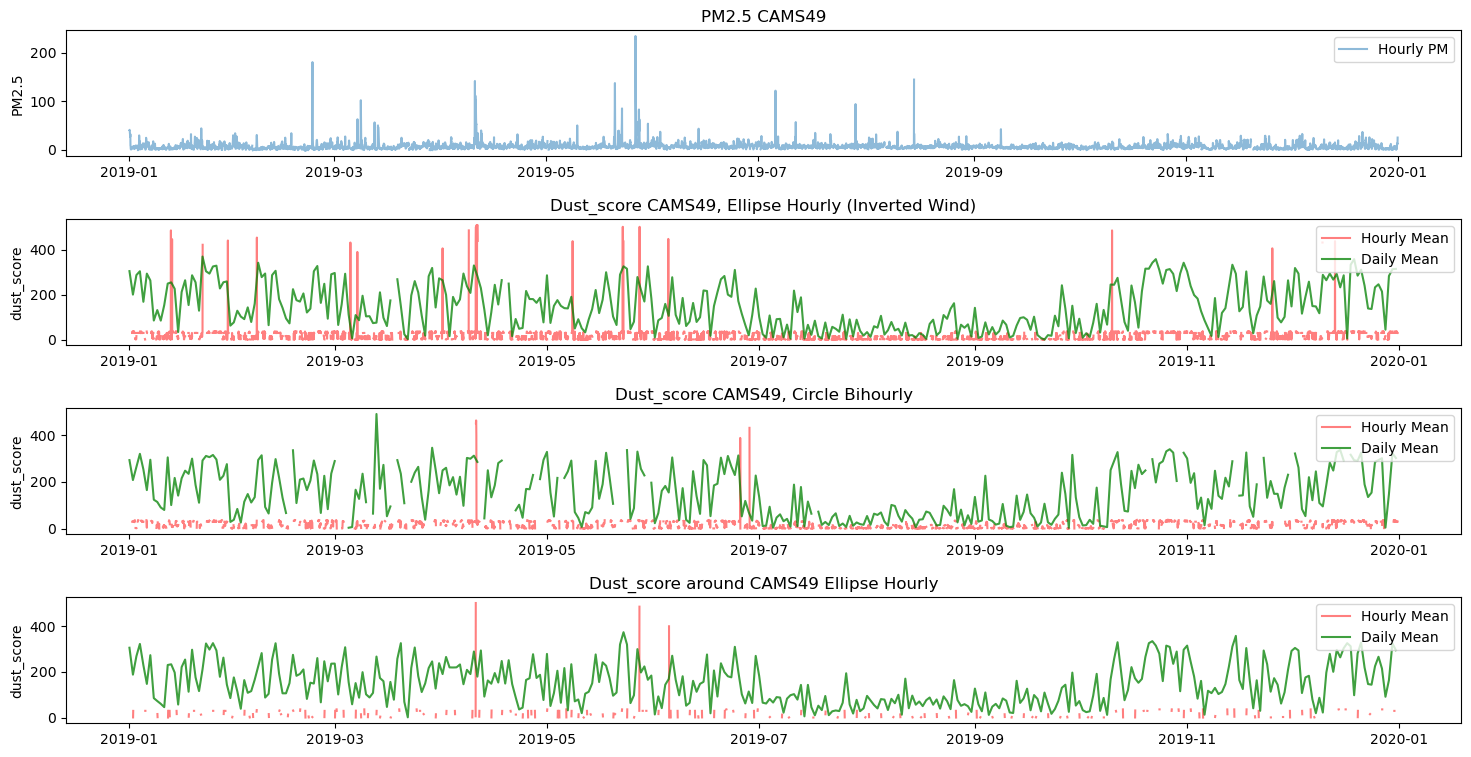

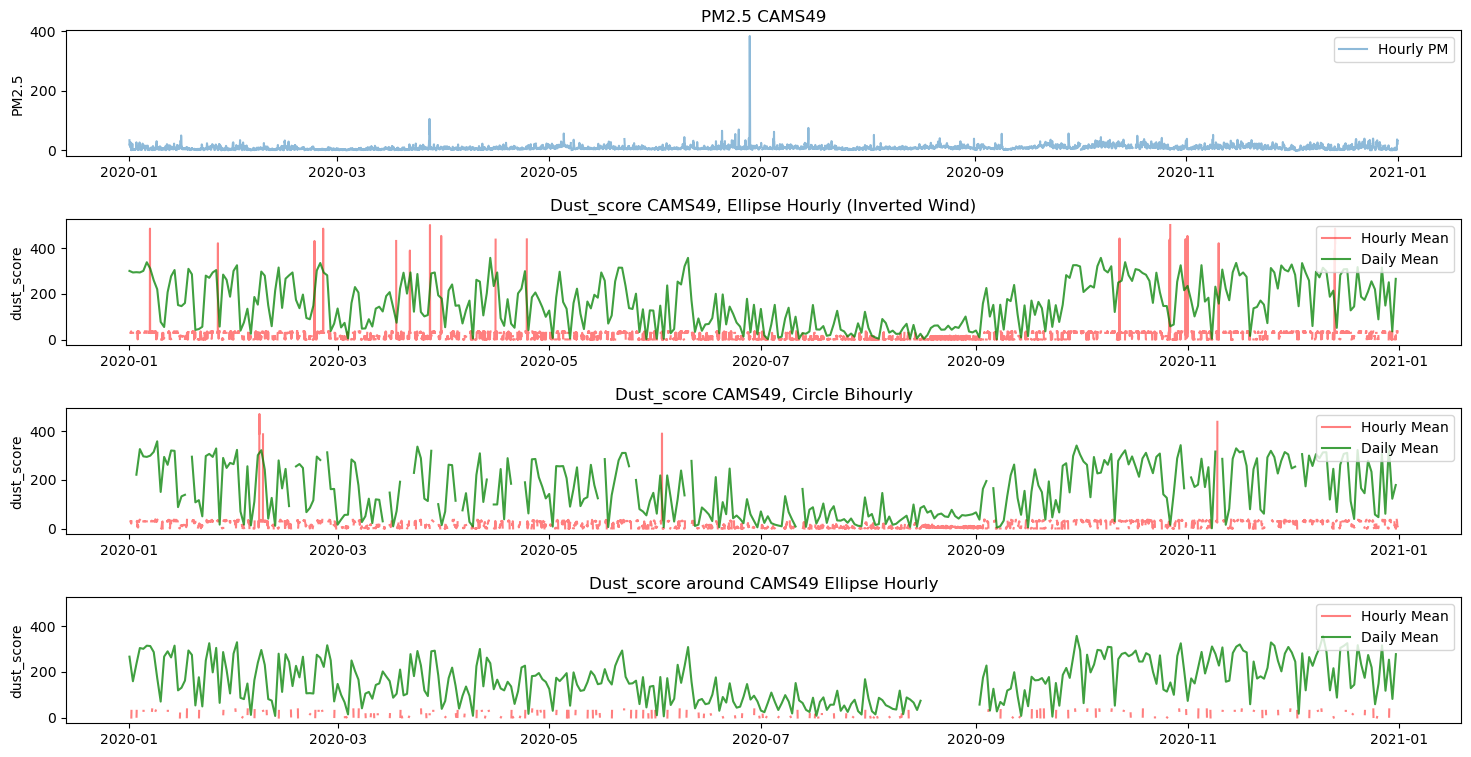

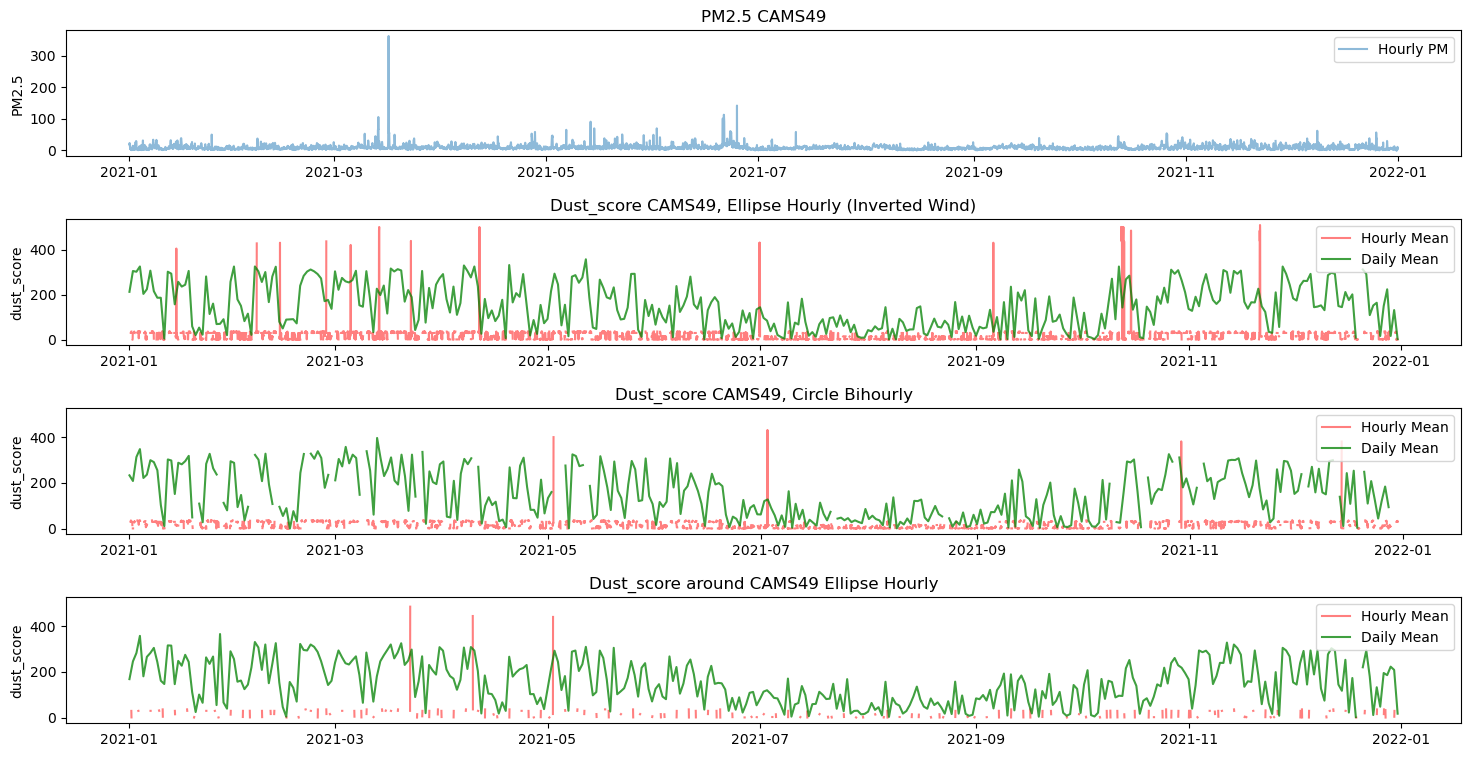

In [53]:
scaled_dust_scores=[]
dust_scores=[]
count=0
for year in [2019,2020,2021]:
    fig,axs=plt.subplots(4, 1,figsize=(18, 9))

    axs[0].set_title(f'PM2.5 CAMS49')
    axs[0].set_ylabel("PM2.5")
    axs[1].set_title(f'Dust_score CAMS49, Ellipse Hourly (Inverted Wind)')
    axs[1].set_ylabel("dust_score")
    axs[2].set_title(f'Dust_score CAMS49, Circle Bihourly')
    axs[2].set_ylabel("dust_score")
    axs[3].set_title(f'Dust_score around CAMS49 Ellipse Hourly')
    axs[3].set_ylabel("dust_score")

    plt.subplots_adjust(hspace=0.5)

    date_index_hourly = pd.date_range(start=f'{year}-01-01', end=f'{year+1}-01-01', freq='H')[:-1]
    date_index= pd.date_range(start=f'{year}-01-01', end=f'{year+1}-01-01', freq='D')[:-1]
    
    file_name_cams49=f'CAMS49_{year}.xlsx'
    file_name_cams1028=f'CAMS1028_{year}.xlsx'
    tecq_cams49=read_xlsx_tecq(file_name_cams49)


    annual_circle_mean=[]
    annual_circle_median=[]
    annual_circle_mode=[]
    
    annual_ellipse_mean_2hr=[]
    annual_ellipse_median_2hr=[]
    annual_ellipse_mode_2hr=[]
    
    annual_ellipse_mean_TEST=[]
    #annual_ellipse_median_4hr=[]
    #annual_ellipse_mode_4hr=[]
    
    annual_ellipse_mean_hourly=[]
    annual_ellipse_median_hourly=[]
    annual_ellipse_mode_hourly=[]
    

    for day in date_index:
        try:
            hourly_circle_mean=dust_score_circle_mean.loc[day.date().strftime('%Y-%m-%d')].values
            hourly_circle_median=dust_score_circle_median.loc[day.date().strftime('%Y-%m-%d')].values
            hourly_circle_mode=dust_score_circle_mode.loc[day.date().strftime('%Y-%m-%d')].values
            hourly_ellipse_mean_2hr=dust_score_ellipse_mean_2hr.loc[day.date().strftime('%Y-%m-%d')].values
            hourly_ellipse_median_2hr=dust_score_ellipse_median_2hr.loc[day.date().strftime('%Y-%m-%d')].values
            hourly_ellipse_mode_2hr=dust_score_ellipse_mode_2hr.loc[day.date().strftime('%Y-%m-%d')].values
            hourly_ellipse_mean_TEST=dust_score_ellipse_mean_TEST.loc[day.date().strftime('%Y-%m-%d')].values
            #hourly_ellipse_median_4hr=dust_score_ellipse_median_4hr.loc[day.date().strftime('%Y-%m-%d')].values
            #hourly_ellipse_mode_4hr=dust_score_ellipse_mode_4hr.loc[day.date().strftime('%Y-%m-%d')].values
            hourly_ellipse_mean_hourly=dust_score_ellipse_mean_hourly.loc[day.date().strftime('%Y-%m-%d')].values
            hourly_ellipse_median_hourly=dust_score_ellipse_median_hourly.loc[day.date().strftime('%Y-%m-%d')].values
            hourly_ellipse_mode_hourly=dust_score_ellipse_mode_hourly.loc[day.date().strftime('%Y-%m-%d')].values
                        
            
            #hourly_ellipse_mean_hourly=interpolate_gaps(hourly_ellipse_mean_hourly,2)
            #hourly_ellipse_median_hourly=interpolate_gaps(hourly_ellipse_median_hourly,2)
            #hourly_ellipse_mode_hourly=interpolate_gaps(hourly_ellipse_mode_hourly,2)
            #hourly_dust_score_circle=interpolate_gaps(hourly_dust_score_circle,1)
            #hourly_dust_score.fillna(method='ffill'hourly_dust_score, limit=1)
            #print(hourly_dust_score)
            #np.insert(annual_dust_score,[day.timetuple().tm_yday], hourly_dust_score)
            
            annual_circle_mean.append(hourly_circle_mean)
            annual_circle_median.append(hourly_circle_median)
            annual_circle_mode.append(hourly_circle_mode)
            annual_ellipse_mean_2hr.append(hourly_ellipse_mean_2hr)
            annual_ellipse_median_2hr.append(hourly_ellipse_median_2hr)
            annual_ellipse_mode_2hr.append(hourly_ellipse_mode_2hr)
            annual_ellipse_mean_TEST.append(hourly_ellipse_mean_TEST)
            #annual_ellipse_median_4hr.append(hourly_ellipse_median_4hr)
            #annual_ellipse_mode_4hr.append(hourly_ellipse_mode_4hr)
            annual_ellipse_mean_hourly.append(hourly_ellipse_mean_hourly)
            annual_ellipse_median_hourly.append(hourly_ellipse_median_hourly)
            annual_ellipse_mode_hourly.append(hourly_ellipse_mode_hourly)

        except KeyError as e:
            print("No data found for date: ",day)
            print("Stopping...")
            print(e)
            break
    
    perday_values_annual_circle_mean=np.array(annual_circle_mean)
    #perhour_values=perday_values_annual_circle_mean.flatten()
    perday_values_annual_circle_median=np.array(annual_circle_median)
    perday_values_annual_circle_mode=np.array(annual_circle_mode)
    perday_values_annual_ellipse_mean_2hr=np.array(annual_ellipse_mean_2hr)
    perday_values_annual_ellipse_median_2hr=np.array(annual_ellipse_median_2hr)
    perday_values_annual_ellipse_mode_2hr=np.array(annual_ellipse_mode_2hr)
    perday_values_annual_ellipse_mean_TEST=np.array(annual_ellipse_mean_TEST)
    #perday_values_annual_ellipse_median_4hr=np.array(annual_ellipse_median_4hr)
    #perday_values_annual_ellipse_mode_4hr=np.array(annual_ellipse_mode_4hr)
    perday_values_annual_ellipse_mean_hourly=np.array(annual_ellipse_mean_hourly)
    perday_values_annual_ellipse_median_hourly=np.array(annual_ellipse_median_hourly)
    perday_values_annual_ellipse_mode_hourly=np.array(annual_ellipse_mode_hourly)

    scaled_perday_values_annual_ellipse_mean_TEST=np.where(perday_values_annual_ellipse_mean_TEST < 380, perday_values_annual_ellipse_mean_TEST * 0.1, perday_values_annual_ellipse_mean_TEST)
    
    
    scaled_perday_values_annual_circle_mean = np.where(perday_values_annual_circle_mean < 380, perday_values_annual_circle_mean * 0.1, perday_values_annual_circle_mean)
    scaled_perday_values_annual_circle_median = np.where(perday_values_annual_circle_median < 380, perday_values_annual_circle_median * 0.1, perday_values_annual_circle_median)
    scaled_perday_values_annual_circle_mode = np.where(perday_values_annual_circle_mode < 380, perday_values_annual_circle_mode * 0.1, perday_values_annual_circle_mode)
    
    
    scaled_perday_values_annual_ellipse_mean_hourly = np.where(perday_values_annual_ellipse_mean_hourly < 380, perday_values_annual_ellipse_mean_hourly * 0.1, perday_values_annual_ellipse_mean_hourly)
    scaled_perday_values_annual_ellipse_median_hourly = np.where(perday_values_annual_ellipse_median_hourly < 380, perday_values_annual_ellipse_median_hourly * 0.1, perday_values_annual_ellipse_median_hourly)
    scaled_perday_values_annual_ellipse_mode_hourly = np.where(perday_values_annual_ellipse_mode_hourly < 380, perday_values_annual_ellipse_mode_hourly * 0.1, perday_values_annual_ellipse_mode_hourly)
    
    scaled_dust_scores.append(scaled_perday_values_annual_ellipse_mean_hourly)
    dust_scores.append(perday_values_annual_ellipse_mean_hourly)
    #np.nan_to_num(daily_values, nan='')
    #print(daily_values)
    axs[0].plot(date_index_hourly, tecq_cams49.values.flatten(), label='Hourly PM',alpha=0.5)
    #axs[0].plot(date_index, np.nanmean(tecq_cams49.values,axis=1), label='Daily Mean PM',color='blue',alpha=0.5)
    #axs[0].set_yscale('log')
    axs[0].legend(loc='upper right')
    #axs[0].hist(timestamps, bins=len(timestamps),alpha=0.5, weights=np.nanmean(tecq_cams49.values,axis=1), label=year)
    axs[1].plot(date_index_hourly, scaled_perday_values_annual_ellipse_mean_hourly.flatten(), label='Hourly Mean',color='red',alpha=0.5)
    #axs[2].plot(date_index_hourly, perday_values_annual_ellipse_median_hourly.flatten(), label='Ellipse hr Median',color='green',alpha=0.5)
    #axs[2].plot(date_index_hourly, perday_values_annual_ellipse_mode_hourly.flatten(), label='Ellipse hr Mode',color='blue',alpha=0.5)
    axs[1].plot(date_index, np.nanmean(perday_values_annual_ellipse_mean_hourly,axis=1), label='Daily Mean',color='green',alpha=0.75)
    axs[1].legend(loc='upper right')

    axs[2].plot(date_index_hourly, scaled_perday_values_annual_ellipse_mean_TEST.flatten(), label='Hourly Mean',color='red',alpha=0.5)
    axs[2].plot(date_index, np.nanmean(perday_values_annual_ellipse_mean_TEST,axis=1), label='Daily Mean',color='green',alpha=0.75)
    axs[2].legend(loc='upper right')
    
    axs[3].plot(date_index_hourly, scaled_perday_values_annual_circle_mean.flatten(), label='Hourly Mean',color='red',alpha=0.5)
    #axs[1].plot(date_index_hourly, scaled_perday_values_annual_circle_median.flatten(), label='Circle Median',color='green',alpha=0.5)
    #axs[1].plot(date_index_hourly, scaled_perday_values_annual_circle_mode.flatten(), label='Circle Mode',color='blue',alpha=0.5)
    axs[3].plot(date_index, np.nanmean(perday_values_annual_circle_mean,axis=1), label='Daily Mean',color='green',alpha=0.75)
    axs[3].legend(loc='upper right')


    

    '''
    axs[4].plot(date_index_hourly, perday_values_annual_ellipse_mean_4hr.flatten(), label='Ellipse 4hr Mean',alpha=0.5)
    axs[4].plot(date_index_hourly, perday_values_annual_ellipse_median_4hr.flatten(), label='Ellipse 4hr Median',color='green')
    axs[4].plot(date_index_hourly, perday_values_annual_ellipse_mode_4hr.flatten(), label='Ellipse 4hr Mode',color='red')
    axs[4].legend()
    '''


(8760,)
-0.09892466357941007 1.690183466140166e-20
0.11398824099064878 9.950889906336547e-27


C:\Users\Zelda64\AppData\Local\Temp\ipykernel_2992\2803380314.py:37: RuntimeWarning: Mean of empty slice
  axs[2].plot(date_index_daily, np.nanmean(dust_scores[count],axis=1), label='Daily Mean',color='green')


(8784,)
-0.1789355114630446 4.1624444630994285e-64
-0.12209912541403943 1.5718995965344971e-30
(8760,)
-0.12164066070367222 3.108990600373391e-30
0.0837502082812535 4.1185445885111095e-15


C:\Users\Zelda64\AppData\Local\Temp\ipykernel_2992\2803380314.py:37: RuntimeWarning: Mean of empty slice
  axs[2].plot(date_index_daily, np.nanmean(dust_scores[count],axis=1), label='Daily Mean',color='green')


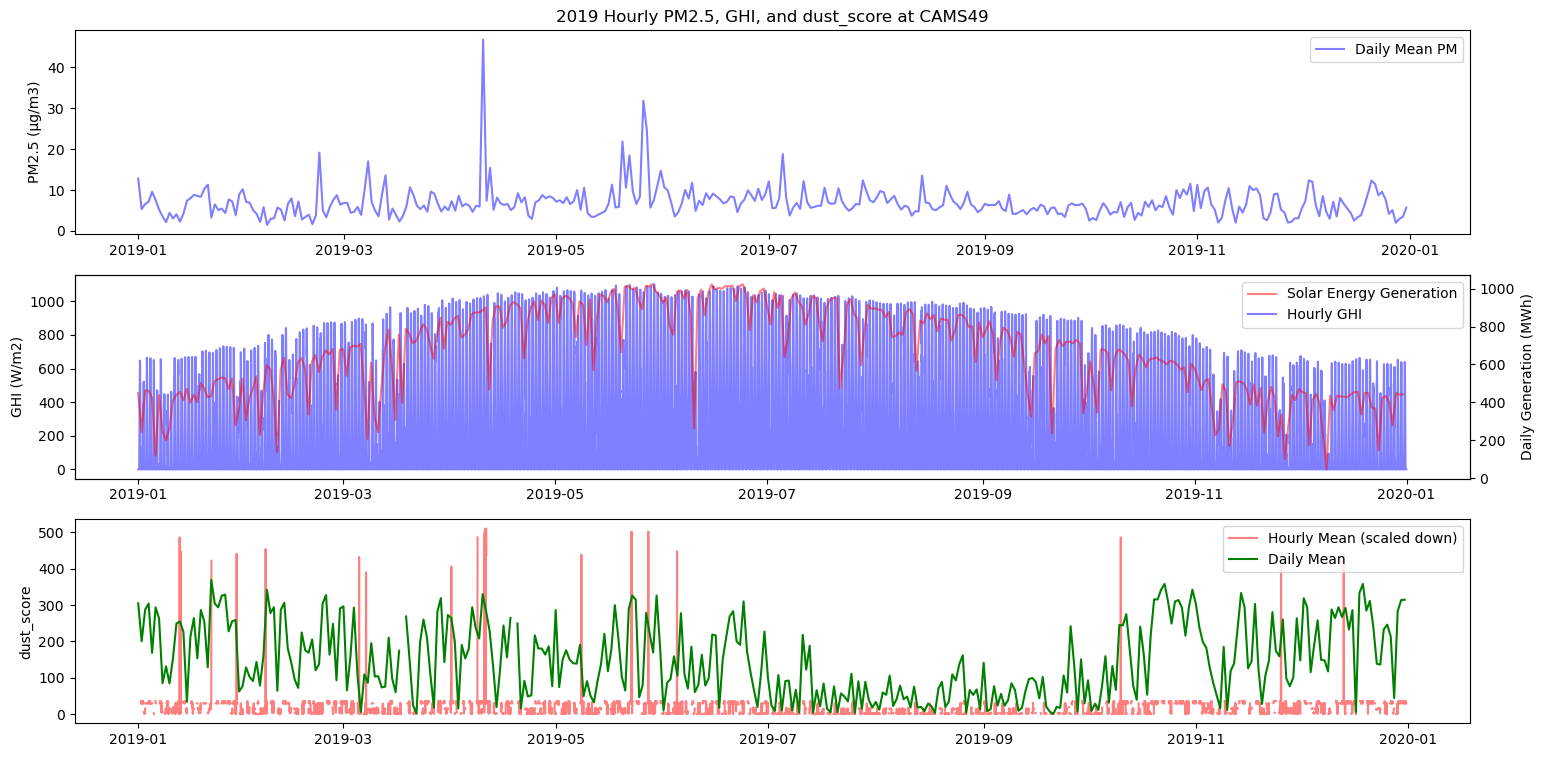

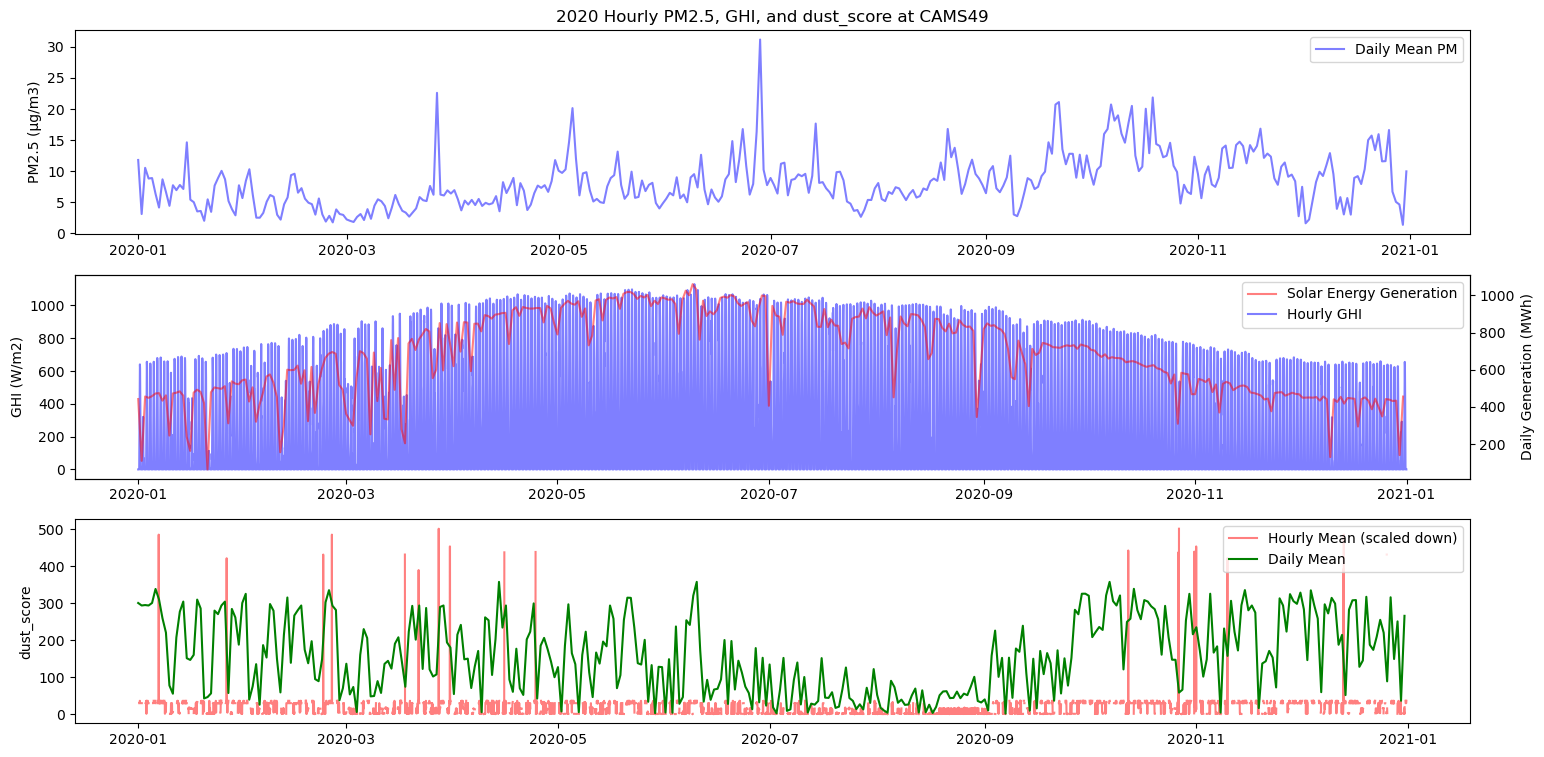

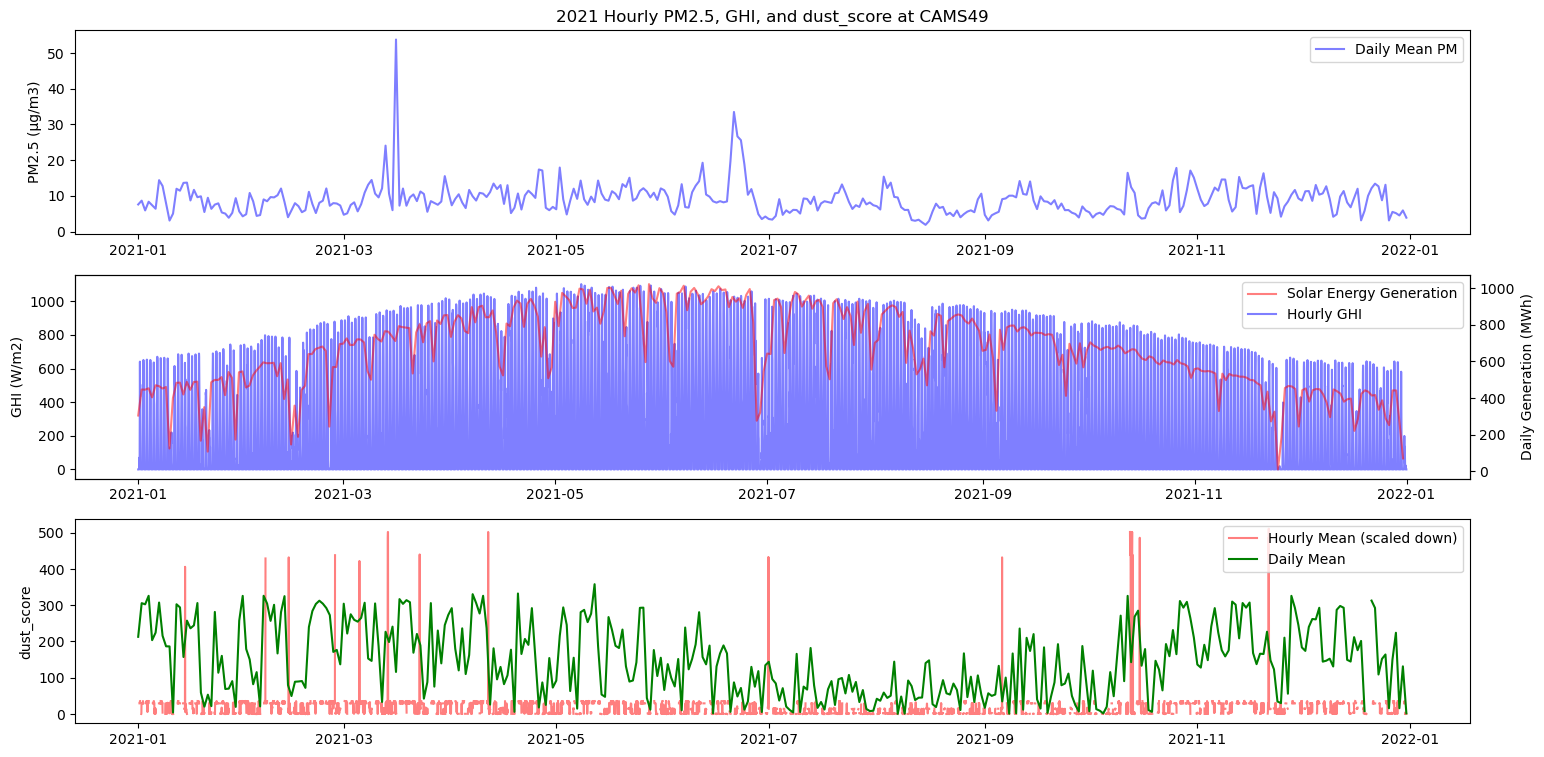

In [35]:
count=0
for year in [2019,2020,2021]:
    
    file_name_cams49=f'CAMS49_{year}.xlsx'
    tecq_cams49=read_xlsx_tecq(file_name_cams49)
    date_index_hourly = pd.date_range(start=f'{year}-01-01', end=f'{year+1}-01-01', freq='H')[:-1]
    date_index_monthly = pd.date_range(start=f'{year}-01-01', end=f'{year+1}-01-01', freq='M')
    print(date_index_hourly.shape)
    date_index_daily=pd.date_range(start=f'{year}-01-01', end=f'{year+1}-01-01', freq='D')[:-1]
    fig,axs=plt.subplots(3, 1,figsize=(18, 9))
    #plt.subplots_adjust(hspace=0.5)
    axs[0].set_title(f'{year} Hourly PM2.5, GHI, and dust_score at CAMS49')
    axs[0].set_ylabel("PM2.5 (μg/m3)")
    #axs[1].set_title(f'2019 Hourly GHI at CAMS49')
    axs[1].set_ylabel("GHI (W/m2)")
    axs[2].set_ylabel("dust_score")
    #axs[3].set_ylabel("wind speed (mph)")
    
    #axs[0].plot(date_index_hourly, tecq_cams49.values.flatten(), label='Hourly PM',alpha=0.5)
    axs[0].plot(date_index_daily, np.nanmean(tecq_cams49.values,axis=1), label='Daily Mean PM',color='blue',alpha=0.5)
    axs[0].legend()
    
    #axs[1].plot(date_index_hourly, ghi_df['DNI'], label='Hourly DNI',color='red',alpha=0.5)
    #not that ghi['GHI'][f'{year}-01-01':f'{year}-12-31'] means that the upper limit will be {year}-12-31 00:00:00 hence the 31st will be included
    axs[1].plot(date_index_hourly, ghi_df['GHI'][f'{year}-01-01':f'{year}-12-31'], label='Hourly GHI',color='blue',alpha=0.5)
    
    
    ax2 = axs[1].twinx()
    ax2.plot(date_index_daily, energy_generation_plant[count], label='Solar Energy Generation',color='red',alpha=0.5)
    ax2.set_ylabel('Daily Generation (MWh)')
    # Display legends
    lines1, labels1 = ax2.get_legend_handles_labels()
    lines2, labels2 = axs[1].get_legend_handles_labels()
    axs[1].legend(lines1 + lines2, labels1 + labels2, loc='upper right')
        
    axs[2].plot(date_index_hourly, scaled_dust_scores[count].flatten(), label='Hourly Mean (scaled down)',color='red',alpha=0.5)
    axs[2].plot(date_index_daily, np.nanmean(dust_scores[count],axis=1), label='Daily Mean',color='green')
    #axs[2].set_yscale('log')
    axs[2].legend(loc='upper right')

    #axs[3].plot(date_index_hourly, ghi_df['Wind Speed'][f'{year}-01-01':f'{year}-12-31'], label='Hourly',alpha=0.5)
    #axs[3].plot(date_index_daily, windspd_year_mean[count], label='Daily Mean',color='green',alpha=0.75)
    #axs[3].plot(date_index_daily, windspd_year_median[count], label='Daily Median wind speed',color='red',alpha=0.75)
    #axs[3].plot(date_index_daily, windspd_year_mode[count], label='Daily Mode wind speed',color='blue',alpha=0.75)

    #axs[3].legend(loc='upper right')

    
    #print(len(ghi_df['DNI']), len(tecq_cams49.values))
    #corr_coefficient, p_value = pearsonr( sun_hours_year[count], np.nanmean(tecq_cams49.values[:-np.abs((len(date_index_daily)-len(sun_hours_year[count])))],axis=1))
    corr_coefficient, p_value = pearsonr(ghi_df['GHI'][f'{year}-01-01':f'{year}-12-31'], tecq_cams49.interpolate().values.flatten())
    corr_coefficient_wind_dust, p_value_wind_dust = pearsonr(ghi_df['Wind Speed'][f'{year}-01-01':f'{year}-12-31'], tecq_cams49.interpolate().values.flatten())
    print(corr_coefficient, p_value )
    print(corr_coefficient_wind_dust, p_value_wind_dust )
    count+=1

In [20]:
#Generation per year
for year in [0,1,2]:
    net_gen=sum(num_peak_sun_hours_year_daily[year]*Wp/1000*panel_yield*number_of_panels*PR)
    print("Generated energy (kWh): ",net_gen)
    print("Number of households: ", net_gen/south_household_consumption_2023)

Generated energy (kWh):  242143211.84256
Number of households:  18119.01176225365
Generated energy (kWh):  249776222.33088005
Number of households:  18690.17213370028
Generated energy (kWh):  243981150.65856004
Number of households:  18256.540437007745


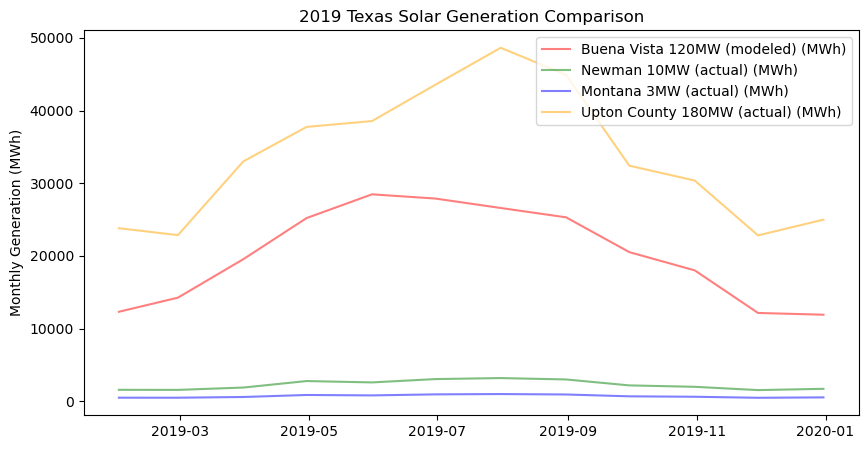

In [17]:
count=0
for year in [2019]:
    
    date_index_monthly = pd.date_range(start=f'{year}-01-01', end=f'{year+1}-01-01', freq='M')
    fig,ax=plt.subplots(1, 1,figsize=(10, 5))
    #plt.subplots_adjust(hspace=0.5)
    ax.set_title(f'{year} Texas Solar Generation Comparison')
    ax.set_ylabel("Monthly Generation (MWh)")
    
    ax.plot(date_index_monthly, num_peak_sun_hours_year_daily[count]*Wp/1000*panel_yield*number_of_panels*PR/1000, label='Buena Vista 120MW (modeled) (MWh)',color='red',alpha=0.5)
    ax.plot(date_index_monthly, elec_gen_2019_newman_elpaso.values, label='Newman 10MW (actual) (MWh)',color='green',alpha=0.5)
    ax.plot(date_index_monthly, elec_gen_2019_montana_elpaso.values, label='Montana 3MW (actual) (MWh)',color='blue',alpha=0.5)
    ax.plot(date_index_monthly, elec_gen_2019_uptoncounty.values, label='Upton County 180MW (actual) (MWh)',color='orange',alpha=0.5)
    ax.legend(loc='upper right')

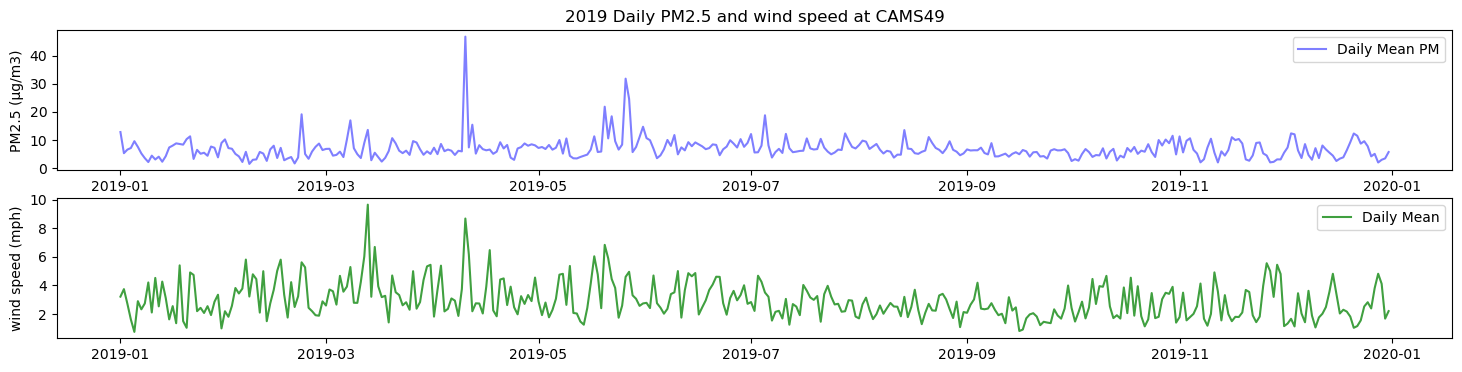

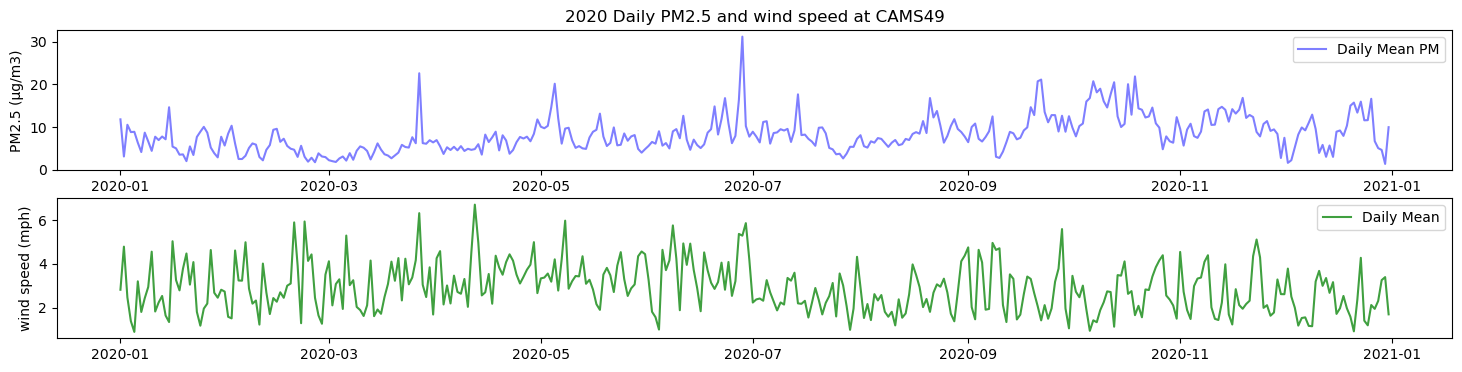

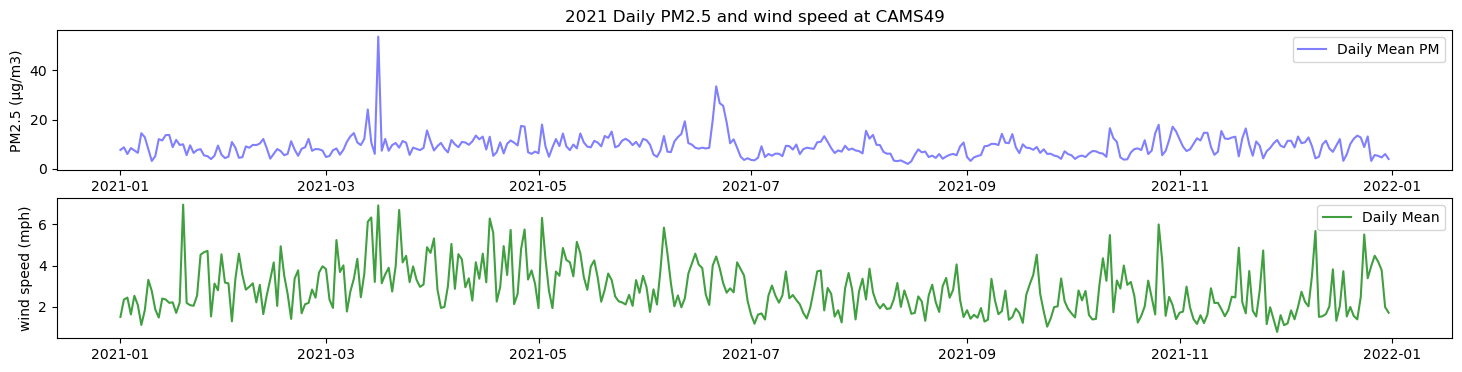

In [46]:
count=0
for year in [2019,2020,2021]:
    
    file_name_cams49=f'CAMS49_{year}.xlsx'
    tecq_cams49=read_xlsx_tecq(file_name_cams49)
    date_index_hourly = pd.date_range(start=f'{year}-01-01', end=f'{year+1}-01-01', freq='H')[:-1]
    date_index_monthly = pd.date_range(start=f'{year}-01-01', end=f'{year+1}-01-01', freq='M')
    date_index_daily=pd.date_range(start=f'{year}-01-01', end=f'{year+1}-01-01', freq='D')[:-1]
    fig,axs=plt.subplots(2, 1,figsize=(18, 4))
    #plt.subplots_adjust(hspace=0.5)
    axs[0].set_title(f'{year} Daily PM2.5 and wind speed at CAMS49')
    axs[0].set_ylabel("PM2.5 (μg/m3)")
    axs[1].set_ylabel('wind speed (mph)')
    
    axs[0].plot(date_index_daily, np.nanmean(tecq_cams49.values,axis=1), label='Daily Mean PM',color='blue',alpha=0.5)
    axs[0].legend(loc='upper right')
        
    axs[1].plot(date_index_daily, windspd_year_mean[count], label='Daily Mean',color='green',alpha=0.75)   
    
    axs[1].legend(loc='upper right')
    count+=1
